<a href="https://colab.research.google.com/github/SalRmz/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica5_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipo #6
## Integrantes:
- Julio Pinzón
- Javier De La Rosa Mondragón
- Luis Fernando Merino
- Salomón Rmz.

----

<h1><center>Monte Carlo</center></h1>
    
    
El algoritmo se basa en el muestreo aleatorio repetido en un intento de determinar la probabilidad. Esto significa simular un evento con entradas aleatorias un gran número de veces para obtener su estimación. 
    
Las simulaciones Monte Carlo se pueden utilizar en una amplia gama de campos que van desde la economía, el juego, la ingeniería, la energía y cualquier otro campo intermedio. Por lo tanto, no importa en qué campo profesional se encuentre, es algo excelente que debe conocer.

---

Al aprender a construir simulaciones Monte Carlo, es mejor comenzar con un modelo básico para comprender los fundamentos. La forma más fácil y común de hacerlo es con juegos simples, por lo que utilizaremos un juego de dados en este caso. 

Probablemente haya escuchado el dicho, "la casa siempre gana", así que para este ejemplo, la casa (típicamente un casino) tendrá una ventaja, y mostraremos lo que eso significa para las posibles ganancias del jugador.



## El juego de dados

Nuestro juego simple involucrará dos dados de seis caras. P

ara ganar, el jugador debe sacar el mismo número en ambos dados. 

Un dado de seis caras tiene seis resultados posibles (1, 2, 3, 4, 5 y 6). Con dos dados, ahora hay 36 resultados posibles (1 y 1, 1 y 2, 1 y 3, etc., o 6 x 6 = 36 posibilidades). 

En este juego, la casa tiene más oportunidades de ganar (30 resultados frente a los 6 resultados del jugador), lo que significa que la casa tiene bastante ventaja.

---

Digamos que nuestro jugador comienza con un saldo de 1,000 y está preparado para perderlo todo, por lo que apuesta 1 en cada tirada (lo que significa que se tiran ambos dados) y decide jugar 1,000 tiradas. Debido a que la casa es tan generosa, ofrecen pagar 4 veces la apuesta del jugador cuando el jugador gana. 

Por ejemplo, si el jugador gana la primera tirada, su saldo aumenta en $4 y finaliza la ronda con un saldo de 1,004. Si milagrosamente lograban una racha de 1000 victorias, podrían irse a casa con 5000. Si perdía todas las rondas, podrían irse a casa sin nada. No es una mala relación riesgo-recompensa… o tal vez lo sea.

In [2]:
# Importando paqueterias
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

DEBUG = 0

Ahora, debemos definir nuestra función que genere valores entre 1 y 6 para ambos dados. Podemos auxiliarnos con la funcion *random.randinit()*

Tomando en consideración la condición de que si el dado 1 es identico al dado 2, tendremos un resultado positivo en la apuesta, caso contrario, tendremos una derrota.

In [3]:
# Creando funcion de lanzamiento de dados
def roll_dice():
    same_num = 0
    roll1 = random.randint(1,6)
    roll2 = random.randint(1,6)
    #print(roll1,roll2)
    if roll1 == roll2:
        same_num = 1
    return same_num
roll_dice()

def roll_dice_1or2_is_win():
    roll = random.randint(1,6)
    
    #print(roll)
    
    if roll <= 2:
        return 1
    else:
        return 0
roll_dice()



1

Cada simulación Monte Carlo requerirá que sepa cuáles son sus entradas y qué información está buscando obtener. 

En esta práctica, ya definimos cuáles son nuestras entradas cuando describimos el juego. **Dijimos que nuestra cantidad de tiradas por juego es 1,000, y la cantidad que el jugador apostará en cada tirada es $1**. 

Además de nuestras variables de entrada, necesitamos definir cuántas veces queremos simular el juego. Podemos usar la variable num_simulations como nuestro conteo de simulación de Monte Carlo. Cuanto más alto hagamos este número, más precisa será la probabilidad predicha de su valor real.

La cantidad de variables que podemos rastrear generalmente aumenta con la complejidad de un proyecto, por lo que es importante precisar sobre qué información deseamos trabajar. 

Para este caso, realizaremos un seguimiento de la probabilidad de ganar (ganancias por juego divididas por el número total de tiradas) y el saldo final para cada simulación (o juego). Estos se inicializan como listas y se actualizarán al final de cada juego.

In [4]:
# Entradas
num_simulations = 10000 #Valor dado
max_num_rolls = 1000
bet = 1

# Seguimiento
win_probability = [0]
end_balance = [0]

# variables extras del equipo
# multiplicador nos dice cuánto se multiplica nuestra apuesta al ganar
multiplicador = 4
initialBalance = 1000

### Configuración de la figura

El siguiente paso es configurar nuestra figura antes de ejecutar la simulación. Al hacer esto antes de la simulación, nos permite agregar líneas a nuestra figura después de cada juego. Luego, una vez que hayamos ejecutado todas las simulaciones, podemos mostrar la gráfica para mostrar nuestros resultados.

En el siguiente código, tenemos un bucle for externo que itera a través de nuestro número predefinido de simulaciones (10 000 simulaciones) y un bucle while anidado que ejecuta cada juego (1000 tiradas). 

Antes de comenzar cada ciclo while, inicializamos el saldo del jugador como $1,000 (como una lista para fines de trazado) y un conteo de tiradas y ganancias.

    * Nuestro bucle while simulará el juego durante 1000 tiradas. Dentro de este bucle, lanzamos los dados y usamos la variable booleana devuelta por roll_dice() para determinar el resultado. Si los dados son del mismo número, agregamos 4 veces la apuesta a la lista de saldo y agregamos una ganancia al conteo de ganancias. Si los dados son diferentes, restamos la apuesta de la lista de saldo. Al final de cada lanzamiento, agregamos un conteo a nuestra lista num_rolls.

Una vez que el número de lanzamientos llega a 1000, podemos calcular la probabilidad de ganar del jugador como el número de ganancias dividido por el número total de lanzamientos. 

También podemos almacenar el saldo final del juego completo en la variable de seguimiento end_balance. Finalmente, podemos trazar las variables num_rolls y balance para agregar una línea a la figura que definimos anteriormente.

Text(0, 0.5, 'Balance')

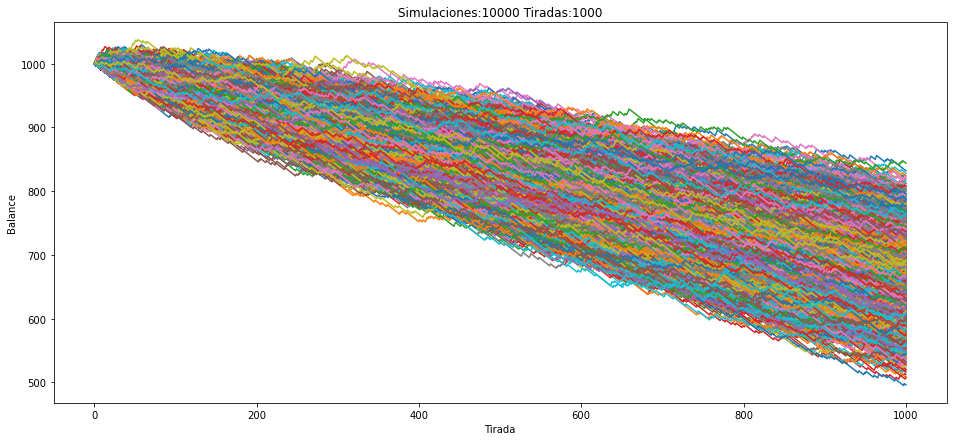

In [5]:
fig = plt.figure(figsize=(16,7))            
# For para ejecutar todas las simulaciones deseadas
for i in range(num_simulations):
#for i in range(1000):
    balance_sim = [1000]
    num_rolls = [0]
    num_wins = [0]
    win_probability_sim = [0]
    
    
    while num_rolls[-1] < max_num_rolls:
        dice = roll_dice()
        num_wins.append( num_wins[-1] + dice )
        num_rolls.append(num_rolls[-1] + 1)# Store tracking variables and add line to figure
        balance_sim.append(balance_sim[-1] -bet + multiplicador*(dice) )
        win_probability_sim.append(num_wins[-1]/num_rolls[-1])
        
        
    win_probability.append(win_probability_sim[-1])
    end_balance.append(balance_sim[-1])
    plt.plot(num_rolls,balance_sim)
    
    if DEBUG:
        for i,j,k,m in zip(num_rolls,num_wins,balance,win_probability_sim):
            print("tirada:",i,"wins:",j,'balance:',k,"win prob;",m)


plt.title("Simulaciones:"+str(num_simulations)+' Tiradas:'+str(max_num_rolls))            
plt.xlabel("Tirada")
plt.ylabel("Balance")


In [6]:
# Probabilidad promedio de victoria y saldo final
import numpy as np
overall_win_probability = np.mean(win_probability)
overall_end_balance = np.mean(end_balance)
print("Promedio de victorias despues de " + str(num_simulations) + " simulaciones: " + str(overall_win_probability))
print("Saldo promedio despues de " + str(num_simulations) + " simulaciones: $" + str(overall_end_balance))

Promedio de victorias despues de 10000 simulaciones: 0.16647405259474055
Saldo promedio despues de 10000 simulaciones: $665.8962103789621


## Desafio complementario

Ahora, realiza el mismo procedimiento pero mostrando los 
resultados para 10, 100, 1000 y 10000 lanzamientos, considerando 200, 2000 y 20000 simulaciones.

Como bien sabemos, cada que gana el individuo, la casa le pagaba 4 veces el valor de la apuesta.
Ahora, si gana, le pagaran 6 veces mas de lo apostado, siempre y cuando el individuo apueste de 3 en 3.

El monto inicial sería ahora de 800. ¿Cuánta diferencia existe entre los resultados obtenidos para cada escenario?
¿En cuales se tiene un porcentaje mayor de victoria? 

**Respuesta del equipo:** cuando apuesta de 3 en tres, uncluso con un multiplicador de ganancia de 6 el jugador por lo general empieza a perder despues pocas tiradas y la tendencia continúa así para más tiradas.

Grafica estos resultados utilizando graficas de pastel y de barras y realiza una comparación entre ellos. 

Promedio de victorias despues de 2000 simulaciones: 0.16670364817591204
Saldo promedio despues de 2000 simulaciones: $801.7651174412794


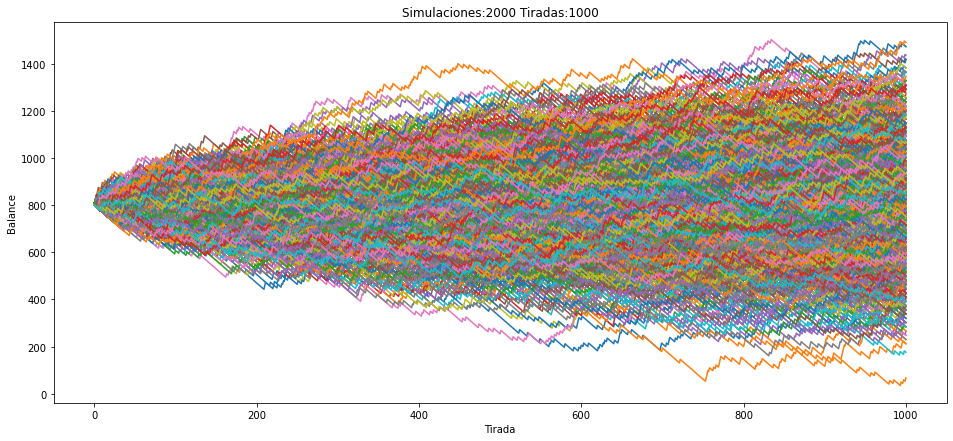

In [7]:
# Entradas
num_simulations = 2000 #Valor dado
max_num_rolls = 1000
bet = 3

# Seguimiento
win_probability = [0]
end_balance = [0]

# variables extras del equipo
# multiplicador nos dice cuánto se multiplica nuestra apuesta al ganar
multiplicador = 6
initialBalance = 800

fig = plt.figure(figsize=(16,7))            
# For para ejecutar todas las simulaciones deseadas
for i in range(num_simulations):
#for i in range(1000):
    balance_sim = [initialBalance]
    num_rolls = [0]
    num_wins = [0]
    win_probability_sim = [0]
    
    
    while num_rolls[-1] < max_num_rolls:
        dice = roll_dice()
        num_wins.append( num_wins[-1] + dice )
        num_rolls.append(num_rolls[-1] + 1)# Store tracking variables and add line to figure
        balance_sim.append(balance_sim[-1] -bet + multiplicador*(dice)*bet )
        win_probability_sim.append(num_wins[-1]/num_rolls[-1])
        
        
    win_probability.append(win_probability_sim[-1])
    end_balance.append(balance_sim[-1])
    plt.plot(num_rolls,balance_sim)
    
    if DEBUG:
        for i,j,k,m in zip(num_rolls,num_wins,balance,win_probability_sim):
            print("tirada:",i,"wins:",j,'balance:',k,"win prob;",m)


plt.title("Simulaciones:"+str(num_simulations)+' Tiradas:'+str(max_num_rolls))            
plt.xlabel("Tirada")
plt.ylabel("Balance")

# Probabilidad promedio de victoria y saldo final
import numpy as np
overall_win_probability = np.mean(win_probability)
overall_end_balance = np.mean(end_balance)
print("Promedio de victorias despues de " + str(num_simulations) + " simulaciones: " + str(overall_win_probability))
print("Saldo promedio despues de " + str(num_simulations) + " simulaciones: $" + str(overall_end_balance))

simulations: 200 rolls: 10 overal_win_prob: 0.169 overal_end_balance: 796.617
simulations: 200 rolls: 100 overal_win_prob: 0.166 overal_end_balance: 795.453
simulations: 200 rolls: 1000 overal_win_prob: 0.166 overal_end_balance: 792.229
simulations: 200 rolls: 10000 overal_win_prob: 0.167 overal_end_balance: 989.333
simulations: 2000 rolls: 10 overal_win_prob: 0.163 overal_end_balance: 798.986
simulations: 2000 rolls: 100 overal_win_prob: 0.167 overal_end_balance: 800.281
simulations: 2000 rolls: 1000 overal_win_prob: 0.167 overal_end_balance: 802.26
simulations: 2000 rolls: 10000 overal_win_prob: 0.167 overal_end_balance: 809.042


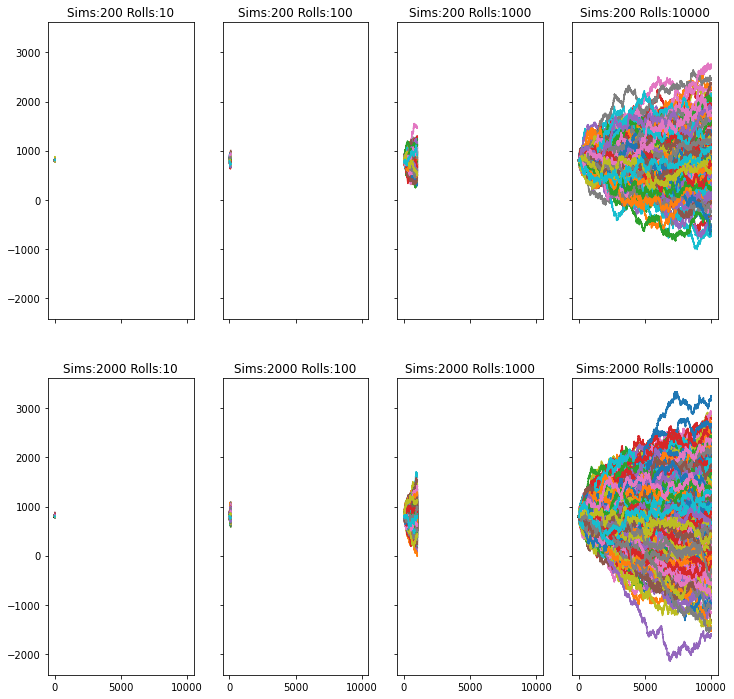

In [8]:
#Ahora, realiza el mismo procedimiento pero mostrando los resultados para 10, 100, 1000 y 10000 lanzamientos,
# considerando 200, 2000 y 20000 simulaciones.

import pandas as pd
# Entradas:
max_num_rolls_array = [10,100,1000,10000]
num_simulations_array = [200,2000] # sin 20000
bet = 3

# variables extras del equipo
# multiplicador nos dice cuánto se multiplica nuestra apuesta al ganar
multiplicador = 6
initialBalance = 800


def func_monte_carlo_dice(num_simulations,max_num_rolls,initialBalance,mutiplier,bet,DEBUG):
    
    win_probability = [0]
    end_balance = [0]
    end_balance_histories = []
    
    for i in range(num_simulations):
        balance_sim = [initialBalance]
        num_rolls = [0]
        num_wins = [0]
        win_probability_sim = [0]
        
        while num_rolls[-1] < max_num_rolls:
            dice = roll_dice()
            num_wins.append( num_wins[-1] + dice )
            num_rolls.append(num_rolls[-1] + 1)# Store tracking variables and add line to figure
            balance_sim.append(balance_sim[-1] -bet + multiplicador*(dice)*bet )
            win_probability_sim.append(num_wins[-1]/num_rolls[-1])

        win_probability.append(win_probability_sim[-1])
        end_balance.append(balance_sim[-1])
        end_balance_histories.append(balance_sim)
        #plt.plot(num_rolls,balance_sim)

        if DEBUG:
            for i,j,k,m in zip(num_rolls,num_wins,balance,win_probability_sim):
                print("tirada:",i,"wins:",j,'balance:',k,"win prob;",m)

    # Probabilidad promedio de victoria y saldo final
    import numpy as np
    overall_win_probability = np.mean(win_probability)
    overall_end_balance = np.mean(end_balance)
    #print("Promedio de victorias despues de " + str(num_simulations) + " simulaciones: " + str(overall_win_probability))
    #print("Saldo promedio despues de " + str(num_simulations) + " simulaciones: $" + str(overall_end_balance))
    
    return overall_win_probability,overall_end_balance,end_balance_histories

figure, axes = plt.subplots(len(num_simulations_array), len((max_num_rolls_array)), figsize=(12,12),sharex=True,sharey=True)
results_to_graph={'simulations':[],'maxRolls':[],'overalWinProb':[],'overalFinalBalance':[]}
# For para ejecutar todas las simulaciones deseadas
for simNumber,num_simulations in enumerate(num_simulations_array):
    for ri,max_num_rolls in enumerate(max_num_rolls_array):
        # ejecuta la función de simulaciones montecarlo:
        overall_win_probability,overall_end_balance,balance_sim_histories = func_monte_carlo_dice(num_simulations,max_num_rolls,initialBalance,multiplicador,bet,False)
        
        results_to_graph['simulations'].append(num_simulations)
        results_to_graph['maxRolls'].append(max_num_rolls)
        results_to_graph['overalWinProb'].append(overall_win_probability)
        results_to_graph['overalFinalBalance'].append(overall_end_balance)
        
        #for resi,res in enumerate(results_prob_and_end_balance):
        print('simulations:',num_simulations,'rolls:',max_num_rolls,'overal_win_prob:',round(overall_win_probability,3),'overal_end_balance:',round(overall_end_balance,3))
    
        for nsim,sim_bal_hist in enumerate(balance_sim_histories):
            axes[simNumber,ri].plot(range(len(sim_bal_hist)),sim_bal_hist)    
        axes[simNumber,ri].set_title("Sims:"+str(num_simulations)+" Rolls:"+str(max_num_rolls))

resultsToGraph_df = pd.DataFrame(results_to_graph)







## Resultados
Comparamos el saldo final promedio de cada grupo de valores de máximo número de tiradas. En estas simulaciones, los jugadores que apostaron más veces (10,000 tiradas) obtuvieron una ganacia respecto al saldo inicial. Mientras que los que no tiraron tantas veces quedaron sólamente cerca de mantener su saldo inicial.

          overalFinalBalance
maxRolls                    
10                797.801211
100               797.866798
1000              797.244363
10000             899.187906


,simulations,maxRolls,overalWinProb,overalFinalBalance,endBalancePercentage
0,200,10,0.169154,796.616915,0.995771
1,200,100,0.165522,795.452736,0.994316
2,200,1000,0.165627,792.228856,0.990286
3,200,10000,0.166911,989.333333,1.236667
4,2000,10,0.163168,798.985507,0.998732
5,2000,100,0.166962,800.280860,1.000351
6,2000,1000,0.166731,802.259870,1.002825
7,2000,10000,0.166636,809.042479,1.011303


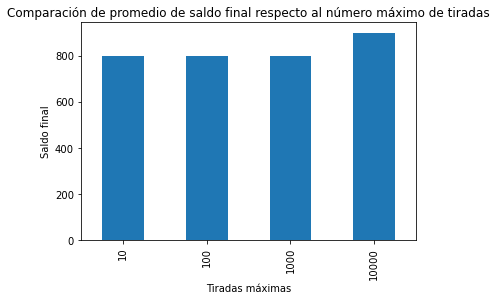

In [47]:
resultsToGraph_df['endBalancePercentage'] = resultsToGraph_df['overalFinalBalance']/initialBalance

#figurePies, axesPies
#figurePies, axesPies = plt.subplots(len(num_simulations_array), len((max_num_rolls_array)), figsize=(12,12))        
#ax = resultsToGraph_df[['endBalancePercentage']].plot.bar(subplots=True, title='Porcentaje de Saldo Final (respecto al inicial)')
resultsToGraph_df.groupby('maxRolls')['overalFinalBalance'].mean().plot.bar()

plt.title('Comparación de promedio de saldo final respecto al número máximo de tiradas')
plt.ylabel("Saldo final")
plt.xlabel("Tiradas máximas")

print(resultsToGraph_df.groupby('maxRolls')['overalFinalBalance'].mean().to_frame())
resultsToGraph_df


simulations: 1000 rolls: 10 overal_win_prob: 0.164 overal_end_balance: 798.721
simulations: 1000 rolls: 100 overal_win_prob: 0.164 overal_end_balance: 795.413
simulations: 1000 rolls: 1000 overal_win_prob: 0.167 overal_end_balance: 803.451
simulations: 1000 rolls: 10000 overal_win_prob: 0.166 overal_end_balance: 776.1
simulations: 20000 rolls: 10 overal_win_prob: 0.166 overal_end_balance: 799.889
simulations: 20000 rolls: 100 overal_win_prob: 0.167 overal_end_balance: 800.685
simulations: 20000 rolls: 1000 overal_win_prob: 0.167 overal_end_balance: 799.476


KeyboardInterrupt: 

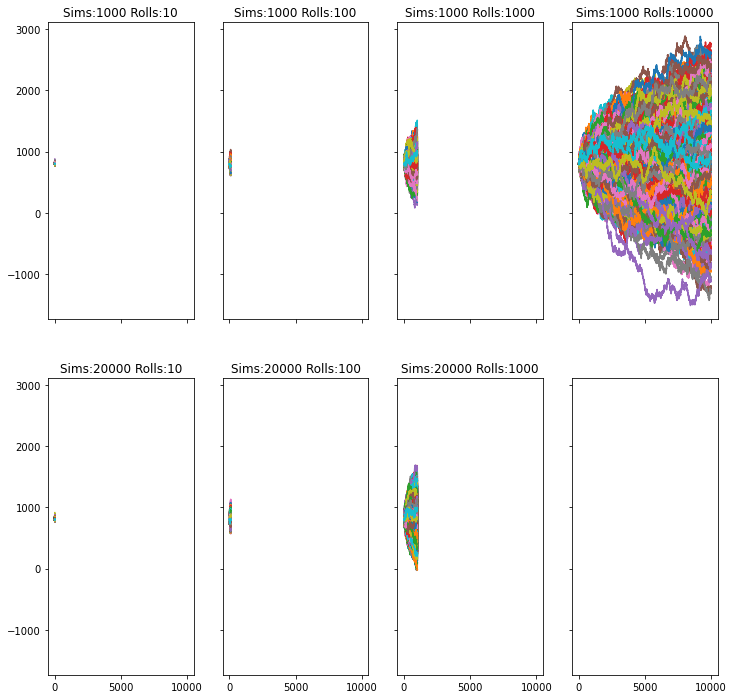

In [9]:
max_num_rolls_array = [10,100,1000,10000]
num_simulations_array = [10,20000]

figure, axes = plt.subplots(len(num_simulations_array), len((max_num_rolls_array)), figsize=(12,12),sharex=True,sharey=True)
results_to_graph={'simulations':[],'maxRolls':[],'overalWinProb':[],'overalFinalBalance':[]}
# For para ejecutar todas las simulaciones deseadas
for simNumber,num_simulations in enumerate(num_simulations_array):
    for ri,max_num_rolls in enumerate(max_num_rolls_array):
        # ejecuta la función de simulaciones montecarlo:
        overall_win_probability,overall_end_balance,balance_sim_histories = func_monte_carlo_dice(num_simulations,max_num_rolls,initialBalance,multiplicador,bet,False)
        
        results_to_graph['simulations'].append(num_simulations)
        results_to_graph['maxRolls'].append(max_num_rolls)
        results_to_graph['overalWinProb'].append(overall_win_probability)
        results_to_graph['overalFinalBalance'].append(overall_end_balance)
        
        #for resi,res in enumerate(results_prob_and_end_balance):
        print('simulations:',num_simulations,'rolls:',max_num_rolls,'overal_win_prob:',round(overall_win_probability,3),'overal_end_balance:',round(overall_end_balance,3))
    
        for nsim,sim_bal_hist in enumerate(balance_sim_histories):
            axes[simNumber,ri].plot(range(len(sim_bal_hist)),sim_bal_hist)    
        axes[simNumber,ri].set_title("Sims:"+str(num_simulations)+" Rolls:"+str(max_num_rolls))

resultsToGraph_df = pd.DataFrame(results_to_graph)

resultsToGraph_df['endBalancePercentage'] = resultsToGraph_df['overalFinalBalance']/initialBalance

#figurePies, axesPies
#figurePies, axesPies = plt.subplots(len(num_simulations_array), len((max_num_rolls_array)), figsize=(12,12))        
resultsToGraph_df[['overalWinProb']].plot.bar(subplots=True)
resultsToGraph_df

Nota: Interrumpimos la simulación anterior ya que para 20,000 simulaciones con 10,000 tiradas el sistema se satura. Sin embargo se nota la misma tendencia en todas las simulaciones. Para una apuesta de 3 con un multiplicador de ganancias de 6 el promedio de saldo final es 800 (igual al saldo inicial) pero el cono de posibilidades es mucho más amplio para 10,000 tiradas.

## ¿Qué es web scrapping?

Es una técnica para recuperar grandes cantidades de datos de Internet.

-----

Existen diferentes técnicas como Scrappy, BeautifulSoup, etc. La librería más común es BeautifulSoup. 

Extrae la página Html de cualquier sitio web. Los datos almacenados por web Scrapping son un formato no estructurado. Convertimos los datos no estructurados en estructurados para el análisis y la exploración de datos.

------

### Bibliotecas utilizadas para Web Scraping

Como sabemos, Python se usa para varias aplicaciones y existen diferentes bibliotecas para diferentes propósitos. En nuestra demostración adicional, usaremos las siguientes bibliotecas:

   * BeautifulSoup: Beautiful Soup es un paquete de Python para analizar documentos HTML y XML. Crea árboles de análisis que son útiles para extraer los datos fácilmente.
   * Pandas: Pandas es una biblioteca que se utiliza para la manipulación y el análisis de datos. Se utiliza para extraer los datos y almacenarlos en el formato deseado.
   * Utilice matplotlib y seaborn para la visualización de datos

------
### ¿Cómo funciona el Web Scraping?

Cuando ejecuta el código para web scraping, se envía una solicitud a la URL que ha mencionado. Como respuesta a la solicitud, el servidor envía los datos y le permite leer la página HTML o XML. Luego, el código analiza la página HTML o XML, encuentra los datos y los extrae.

Para extraer datos utilizando web scraping con Python, debe seguir estos pasos básicos:

   * Busque la URL que desea raspar
   * Inspecciona la página
   * Encuentra los datos que quieres extraer
   * Escribe el codigo
   * Ejecute el código y extraiga los datos
   * Almacene los datos en el formato requerido

------

-------

### Datos del sitio web de Flipkart

Para comprobar cuál debería ser el precio óptimo de nuestro producto, estos precios pueden variar mucho. Entonces, vamos a mostrar cómo podemos obtener información relacionada con un producto en particular (computadora portátil).

Primero, importemos todas las bibliotecas necesarias:

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

Los datos que extraemos son datos no estructurados. Por eso, crearemos listas vacías para almacenarlas de forma estructurada

In [2]:
name=[]
prices=[]
ratings=[]
df = pd.DataFrame()

## Paso 1: busque la URL

Para este ejemplo, vamos a **raspar** (Scrap) el sitio web de **Flipkart** para extraer el nombre, el precio y la calificación de las computadoras portátiles. La URL de esta página es:

[Flipkart](https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.)

In [3]:
url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY."

In [4]:
flipkart_response = requests.get(url)
flipkart_response

<Response [200]>

### Paso 2: inspección de la página

Los datos suelen estar anidados en etiquetas. Entonces, inspeccionamos la página para ver, bajo qué etiqueta están anidados los datos que queremos raspar. Para inspeccionar la página, simplemente haga clic derecho en el elemento y haga clic en "Inspeccionar" (o F12).

![img](https://miro.medium.com/max/571/0*TF2VBxPanqhxb-hY.png)

### Paso 3: busque los datos que desea extraer

Extraemos el nombre, precio y calificación que están anidados en la etiqueta "div" respectivamente.

Por lo general, nos confundiremos sobre qué etiqueta necesitamos copiar para esta computadora portátil. Podemos usar https://webformatter.com/ para filtrar la etiqueta por el nombre, el precio y la calificación, y podemos copiar fácilmente con esta herramienta.

Ahora que hemos escrito el código para abrir la URL, es hora de extraer los datos del sitio web. Como se mencionó anteriormente, los datos que queremos extraer están anidados en etiquetas <div>. Entonces, encontraremos las etiquetas div con esos respectivos nombres de clase, extraeremos y almacenaremos los datos en una variable. Consulte el código a continuación:

In [5]:
flipkart_response.text

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.a47a6a.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.p

In [6]:
soup = BeautifulSoup(flipkart_response.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [7]:
main_box=soup.find_all("div", {"class":"_13oc-S"})
len(main_box)

24

In [8]:
box=main_box[0]
box

<div class="_13oc-S"><div data-id="COMGHYYKESUN5ZKQ" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" href="/hp-victus-intel-core-i5-11th-gen-16-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-16-d0311tx-gaming-laptop/p/itm22c164f45d999?pid=COMGHYYKESUN5ZKQ&amp;lid=LSTCOMGHYYKESUN5ZKQNTQDKG&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_2Eb5EZU7njcYopnUYIn33fcgEWISyie%2BST8T12tt5qaCv5%2FlDM1iM4JgySRAnsJhVWqwQTijCqeUWUawETN5xw%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=op96mhxs800000001677940536463&amp;qH=c06ea84a1e3dc3c6" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="HP Victus Intel Core i5 11th Gen - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX ..." class="_396cs4" loading="eager" src="https://rukminim

In [9]:
title = box.find('div', {'class':'_4rR01T'}).text.strip()
rating = box.find('div', {'class':'_3LWZlK'}).text.strip()
price = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()

In [10]:
print(title,price,rating)

HP Victus Intel Core i5 11th Gen - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX ... 65,990 4.4


In [11]:
data_list=[]
for box in main_box:
    temp_dict={}
    if not box.find('div', {'class':'_3LWZlK'}):
        temp_dict['rating'] = "unknown"
    else:
        temp_dict['rating'] = box.find('div', {'class':'_3LWZlK'}).text.strip()  
        
        
    if not box.find('div', {'class':'_4rR01T'}):
        temp_dict['title'] = "unknown"
    else:
        temp_dict['title'] = box.find('div', {'class':'_4rR01T'}).text.strip()  
        
    if not box.find('div', {'class':'_30jeq3 _1_WHN1'}):
        temp_dict['price'] = "unknown"
    else:
        temp_dict['price'] = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()  

    data_list.append(temp_dict)

In [12]:
data_list

[{'rating': '4.4',
  'title': 'HP Victus Intel Core i5 11th Gen - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX ...',
  'price': '65,990'},
 {'rating': '4.3',
  'title': 'Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce...',
  'price': '66,498'},
 {'rating': '4.4',
  'title': 'ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...',
  'price': '49,990'},
 {'rating': '4.3',
  'title': 'ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...',
  'price': '32,990'},
 {'rating': '4.2',
  'title': 'HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop',
  'price': '35,490'},
 {'rating': '4',
  'title': 'HP Athlon Dual Core 3050U - (8 GB/512 GB SSD/Windows 11 Home) 15s- eq1559AU Thin and Light Laptop',
  'price': '29,990'},
 {'rating': '4.1',
  'title': 'ASUS VivoBook 14

### Paso 4: Crear un dataframe y guardar los datos en csv

Después de extraer los datos, es posible que desee almacenarlos en un formato. Este formato varía según sus necesidades. Para este ejemplo, almacenaremos los datos extraídos en formato CSV (valores separados por comas). Para hacer esto, agregaré las siguientes líneas a mi código:

In [13]:
df = pd.DataFrame.from_records(data_list)
df.head()

,rating,title,price
0,4.4,HP Victus Intel Core i5 11th Gen - (16 GB/512 ...,"65,990"
1,4.3,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,"66,498"
2,4.4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"49,990"
3,4.3,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"32,990"
4,4.2,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"35,490"


### Paso 5: Un poco de EDA y visualización de este archivo

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  24 non-null     object
 1   title   24 non-null     object
 2   price   24 non-null     object
dtypes: object(3)
memory usage: 704.0+ bytes


In [15]:
#<COMPLETA> | Crea una copia auxiliar llamada laptop_df
laptop_df = df.copy()

Quiero dividir el título debido a todas las especificaciones y nombres de portátiles en una fila.

Lo dividiremos en diferentes columnas por separado usando la opción split ()

In [16]:
laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str
del laptop_df['title']
laptop_df.head()

/tmp/ipykernel_162819/2258798354.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str


,rating,price,model,spec
0,4.4,"65,990",HP Victus Intel Core i5 11th Gen,(16 GB/512 GB SSD/Windows 11 Home/4 GB Graphi...
1,4.3,"66,498",Lenovo IdeaPad Gaming Core i5 11th Gen,(8 GB/512 GB SSD/Windows 11 Home/4 GB Graphic...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,(8 GB/512 GB SSD/Windows 11 Home/4 GB Graphic...
3,4.3,"32,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,(8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ36...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,(8 GB/256 GB SSD/Windows 11 Home) 14s - dy250...


Usamos esta opción dividida (split "-") para separar del título y crear una columna separada como modelo y especificación y eliminar el título

In [17]:
laptop_df['spec'] = laptop_df['spec'].str.replace('(','')
laptop_df['RAM'], laptop_df['HDD'] = laptop_df['spec'].str.split('/', 1).str
del laptop_df['spec']
laptop_df.head()

/tmp/ipykernel_162819/3423920400.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  laptop_df['spec'] = laptop_df['spec'].str.replace('(','')
/tmp/ipykernel_162819/3423920400.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['RAM'], laptop_df['HDD'] = laptop_df['spec'].str.split('/', 1).str


,rating,price,model,RAM,HDD
0,4.4,"65,990",HP Victus Intel Core i5 11th Gen,16 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDI...
1,4.3,"66,498",Lenovo IdeaPad Gaming Core i5 11th Gen,8 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDI...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDI...
3,4.3,"32,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD/Windows 11 Home) 14s - dy2507TU Thi...


In [18]:
laptop_df['Storage'], laptop_df['OS'] = laptop_df['HDD'].str.split('/', 1).str
del laptop_df['HDD']
laptop_df.head(10)

/tmp/ipykernel_162819/2045952236.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['Storage'], laptop_df['OS'] = laptop_df['HDD'].str.split('/', 1).str


,rating,price,model,RAM,Storage,OS
0,4.4,"65,990",HP Victus Intel Core i5 11th Gen,16 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...
1,4.3,"66,498",Lenovo IdeaPad Gaming Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...
3,4.3,"32,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home) X515JA-EJ362WS | X515JA-E...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home) 14s - dy2507TU Thin and Light...
5,4,"29,990",HP Athlon Dual Core 3050U,8 GB,512 GB SSD,Windows 11 Home) 15s- eq1559AU Thin and Light ...
6,4.1,"21,990",ASUS VivoBook 14 (2021) Celeron Dual Core,4 GB,256 GB SSD,Windows 11 Home) X415MA-BV011W Thin and L...
7,unknown,"69,990",Lenovo Yoga Slim 7 Pro Core i5 11th Gen,16 GB,512 GB SSD,Windows 11 Home) 14IHU5 Thin and Light Lap...
8,4.7,"86,990",APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur) MGN63HN/A
9,3.9,"18,990",Lenovo Athlon Dual Core,4 GB,256 GB SSD,DOS) E41-55 45-2 Laptop


Continuemos hasta conseguir lo siguiente...

In [19]:
laptop_df['System'], laptop_df['Other_Info'] = laptop_df['OS'].str.split(')', 1).str
del laptop_df['OS']
laptop_df.head(15)

/tmp/ipykernel_162819/2250847191.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['System'], laptop_df['Other_Info'] = laptop_df['OS'].str.split(')', 1).str


,rating,price,model,RAM,Storage,System,Other_Info
0,4.4,"65,990",HP Victus Intel Core i5 11th Gen,16 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
1,4.3,"66,498",Lenovo IdeaPad Gaming Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce...,NaN
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
3,4.3,"32,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS | X515JA-E...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop
5,4,"29,990",HP Athlon Dual Core 3050U,8 GB,512 GB SSD,Windows 11 Home,15s- eq1559AU Thin and Light Laptop
6,4.1,"21,990",ASUS VivoBook 14 (2021) Celeron Dual Core,4 GB,256 GB SSD,Windows 11 Home,X415MA-BV011W Thin and L...
7,unknown,"69,990",Lenovo Yoga Slim 7 Pro Core i5 11th Gen,16 GB,512 GB SSD,Windows 11 Home,14IHU5 Thin and Light Lap...
8,4.7,"86,990",APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur,MGN63HN/A
9,3.9,"18,990",Lenovo Athlon Dual Core,4 GB,256 GB SSD,DOS,E41-55 45-2 Laptop


### Paso 6: Identificación de valores perdidos

Los métodos isnull () y notnull () son las formas más comunes de identificar valores perdidos.

Mientras maneja los datos faltantes, primero debe identificar las filas y columnas que contienen los valores faltantes, contar el número de valores faltantes y luego decidir cómo desea tratarlos.

Es importante que trate los valores faltantes en cada columna por separado, en lugar de implementar una única solución (por ejemplo, reemplazar los NaN por la media de una columna) para todas las columnas.

isnull () devuelve un valor booleano (Verdadero / Falso) que luego se puede usar para encontrar las filas o columnas que contienen valores perdidos.

In [21]:
laptop_df.isnull()

,rating,price,model,RAM,Storage,System,Other_Info
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


### Identificación de valores perdidos en columnas

Primero calculemos el número total de valores faltantes en el marco de datos. Puede calcular el número de valores perdidos en cada columna mediante df.isnull().Sum()

In [32]:
laptop_df[laptop_df.rating=='unknown'] = None
laptop_df[laptop_df.price=='unknown'] = None
#laptop_df[laptop_df.title=='unknown'] = None

laptop_df.dropna(axis=0, inplace=True)
len(laptop_df.index)


17

In [33]:
laptop_df.notnull()

,rating,price,model,RAM,Storage,System,Other_Info
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True
10,True,True,True,True,True,True,True
12,True,True,True,True,True,True,True
13,True,True,True,True,True,True,True
14,True,True,True,True,True,True,True


In [34]:
laptop_df.value_counts('model')

model
HP Athlon Dual Core 3050U                                  2
APPLE 2020 Macbook Air M1                                  1
ASUS VivoBook 14 (2021) Celeron Dual Core                  1
ASUS VivoBook 15 (2022) Core i3 10th Gen                   1
ASUS Vivobook 15 Core i3 11th Gen                          1
ASUS Vivobook 15 Core i7 11th Gen                          1
ASUS Zenbook 14X (2022) Space Edition Core i9 12th Gen     1
DELL Vostro Core i3 10th Gen                               1
DELL Vostro Core i3 11th Gen                               1
HP 14s Intel Core i3 11th Gen                              1
HP 15s Intel Core i3 12th Gen                              1
HP Ryzen 5 Hexa Core 5500U                                 1
Lenovo Athlon Dual Core                                    1
Lenovo V15 G2 Core i3 11th Gen                             1
RedmiBook Pro Core i5 11th Gen                             1
acer Aspire 3 Ryzen 3 Dual Core 3250U                      1
dtype: int64

In [35]:
laptop_df.describe()

,price
count,17.000000
mean,45253.294118
std,32318.682747
min,18990.000000
25%,29990.000000
50%,35990.000000
75%,43990.000000
max,154990.000000


In [36]:
#for c in laptop_df.columns:
#    print(str(c),laptop_df[c].dtype)
laptop_df.dtypes

rating         object
price         float64
model          object
RAM            object
Storage        object
System         object
Other_Info     object
dtype: object

Modifiquemos la columna de precio y rating para que sean de tipo numerico

In [38]:
# laptop_df['price'].str.replace(',','').astype(int)
# o bien:
# pd.to_numeric(laptop_df['price'].str.replace(',',''))

laptop_df['price'] = laptop_df['price'].astype(float)

laptop_df['rating'] = pd.to_numeric(laptop_df['rating'])

In [39]:
laptop_df.describe()

,rating,price
count,17.000000,17.000000
mean,4.205882,45253.294118
std,0.224918,32318.682747
min,3.900000,18990.000000
25%,4.100000,29990.000000
50%,4.200000,35990.000000
75%,4.300000,43990.000000
max,4.700000,154990.000000


In [40]:
laptop_df.dtypes

rating        float64
price         float64
model          object
RAM            object
Storage        object
System         object
Other_Info     object
dtype: object

Ahora necesitamos filtrar las mejores computadoras portátiles con buenas especificaciones, precio y calificación de la lista.

Muestra los siguientes resultados:
 * Laptops en rating <= 4
 * Laptops con rating >= 3.5 y un precio entre 30 y 40 mil $

In [41]:
laptop_df[(laptop_df.rating<=4)]

,rating,price,model,RAM,Storage,System,Other_Info
5,4.0,29990.0,HP Athlon Dual Core 3050U,8 GB,512 GB SSD,Windows 11 Home,15s- eq1559AU Thin and Light Laptop
9,3.9,18990.0,Lenovo Athlon Dual Core,4 GB,256 GB SSD,DOS,E41-55 45-2 Laptop
10,4.0,37990.0,DELL Vostro Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,Vostro 3510 Thin and Light L...
17,4.0,26490.0,HP Athlon Dual Core 3050U,8 GB,256 GB SSD,Windows 11 Home,14s-fq0568AU Thin and Light Laptop


In [42]:
laptop_df[(laptop_df.rating>=3.5) & (laptop_df.price>=30000) & (laptop_df.price<=40000)]

,rating,price,model,RAM,Storage,System,Other_Info
3,4.3,32990.0,ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS | X515JA-E...
4,4.2,35490.0,HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop
10,4.0,37990.0,DELL Vostro Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,Vostro 3510 Thin and Light L...
13,4.4,35490.0,Lenovo V15 G2 Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,V15 ITL G2 Laptop
18,4.1,36990.0,DELL Vostro Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,Vostro 3510 Thin and Light Laptop
21,4.1,36966.0,RedmiBook Pro Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home,Thin and Light Laptop
23,4.1,35990.0,ASUS Vivobook 15 Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,X515EA-EJ322WS Thin and Light La...


---------

### Visualización de los datos

Realizaremos una gráfica de barras de precio vs rating

[Text(0.5, 1.0, 'Precio vs Calificación')]

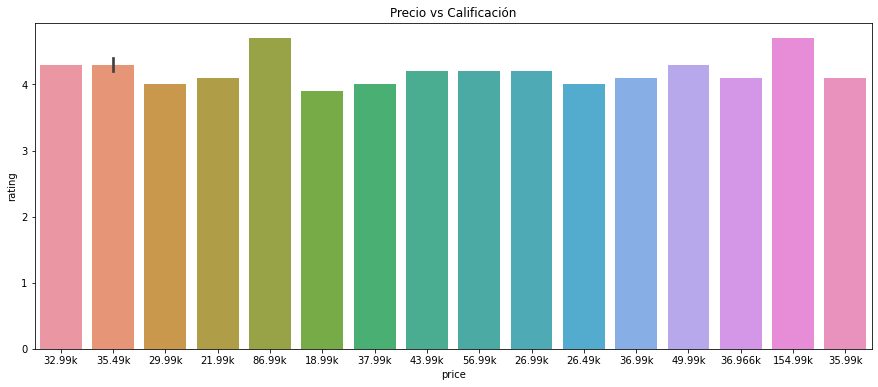

In [43]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x=(laptop_df.price/1000).astype(str)+'k', y=laptop_df.rating)
ax.set(title='Precio vs Calificación')


[Text(0.5, 1.0, 'Calificación vs Precio')]

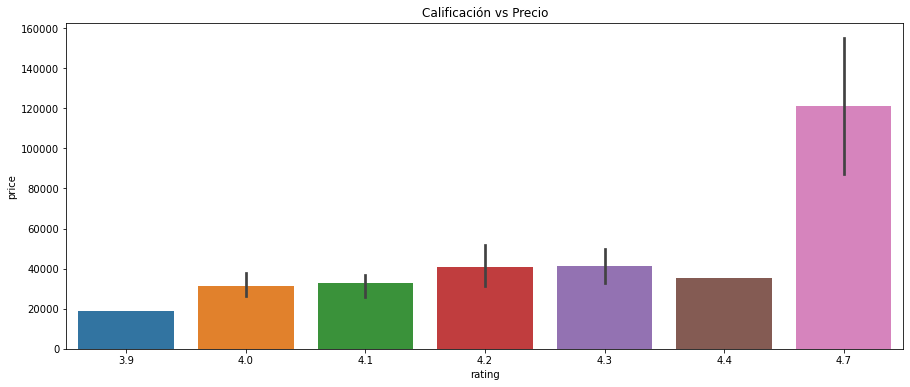

In [44]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x=laptop_df.rating, y=laptop_df.price)
ax.set(title='Calificación vs Precio')

Podemos concluir a partir de aquí que los productos con precios más altos tienen calificaciones más altas hasta cierto punto.

count        17.000000
mean      45253.294118
std       32318.682747
min       18990.000000
25%       29990.000000
50%       35990.000000
75%       43990.000000
max      154990.000000
Name: price, dtype: float64

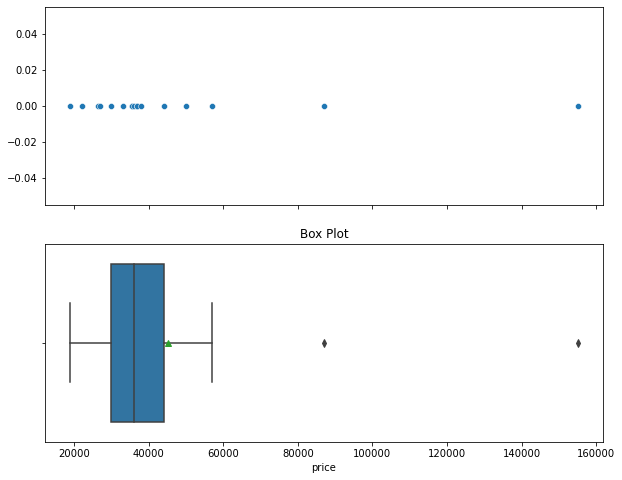

In [45]:
# para una figura con un solo plot sería:
#fig, ax = plt.subplots(figsize=(10,4))

# para dos plots en una figura (que comparten eje x):
fig, ax = plt.subplots(2,1,figsize=(10,8), sharex=True)

sns.scatterplot(x=laptop_df.price.sort_values(), y=0, ax=ax[0])

# boxplot que muestra la media (ax[1] es para que use el segundo plot en la figura)
sns.boxplot(x=laptop_df.price,showmeans=True, ax=ax[1]) # usamos showmeans para que aparezca el punto donde se encuentra la media

ax[1].set(title='Box Plot')

# imprimimos describe de price para comprar con la gráfica de caja
laptop_df.price.describe()

## ¿Les ha salido algún discordante visual a ustedes?

**Respuesta del equipo:** Sí, dos valores de precio que están muy alejados del resto y se ve claramente en el boxplot. Estos valores afectan claramente el valor de la media.

In [49]:
laptop_df.sort_values(by='price',ascending=False)[:5]

,rating,price,model,RAM,Storage,System,Other_Info
22,4.7,154990.0,ASUS Zenbook 14X (2022) Space Edition Core i9 ...,32 GB,1 TB SSD,Windows 11 Home,UX5401ZAS-KN...
8,4.7,86990.0,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur,MGN63HN/A
14,4.2,56990.0,ASUS Vivobook 15 Core i7 11th Gen,16 GB,512 GB SSD,Windows 11 Home,X515EA-EJ701WS Thin and Light L...
20,4.3,49990.0,HP Ryzen 5 Hexa Core 5500U,16 GB,512 GB SSD,Windows 11 Home,15s- eq2182AU Thin and Light Laptop
12,4.2,43990.0,HP 15s Intel Core i3 12th Gen,8 GB,512 GB SSD,Windows 11 Home,15s-fq5007TU Thin and Light Laptop


### ¿Para ustedes, cuáles fueron las computadoras más caras?

A nosotros no salió un computadora con 32 GB de RAM y 1 TB de HDD que estámuy por encima del precio de todas las demás.